Clustering with and without GC content. 

- Distance used ```MANHATAN```
- Region [1000000, 20000000]
- Number of cluster 4
- Initial medoids: [37898, 57966, 170892, 21904]

In [13]:
import sys

In [14]:
sys.path.append("../")

In [15]:
from helpers import read_configuration_file
import json
import matplotlib.pyplot as plt
import seaborn as sns

Configuration for the runs

In [16]:
# load the configuration
configuration=read_configuration_file("../config.json")
print(configuration)

{'regions': {'start': [1000000], 'end': [20000000]}, 'regions_files': ['/home/a/ag568/region_0.txt'], 'chromosome': 'chr1', 'reference_file': {'filename': '/scratch/spectre/a/ag568/GCA_000001405.15_GRCh38_no_alt_analysis_set.fna'}, 'no_wga_file': {'filename': '/scratch/spectre/a/ag568/m585_verysensitive_trim_sorted.bam'}, 'wga_file': {'filename': '/scratch/spectre/a/ag568/m605_verysensitive_trim_sorted.bam'}, 'processing': {'type': 'multi', 'n_procs': 5}, 'sam_read_config': {'max_depth': 1000, 'ignore_orphans': False, 'truncate': True, 'quality_threshold': 20, 'add_indels': True}, 'debug': {'log_bam_for_debug': False}, 'window_size': 100, 'save_windows': False, 'remove_windows_with_gaps': False, 'mark_for_gap_windows': -999.0, 'save_cluster_dbi': False, 'n_windows_dist': {'name': 'uniform', 'config': {'parameters': [-999.5, -998.5]}}, 'windows_filename': 'hmm_windows.json', 'check_windowing_sanity': True, 'outlier_remove': {'name': 'zscore', 'config': {'sigma_factor': 2}}, 'clusterer':

In [17]:
# let's plot the clusters and see what we have
def plot_cluster(filename, nbins=35, kde=False, rug=True):

    with open(filename) as file:
        context = file.read()
        size = len(context)
        arraystr= context[1:size-1]
        arraystr = arraystr.split(',')
        cluster_0_counts = [float(item) for item in arraystr]
        sns.distplot(cluster_0_counts, bins=nbins, kde=kde, rug=rug)
        plt.show()

In [18]:
sns.set(color_codes=True)
%matplotlib inline

## Clusters means with GC content

In [21]:
ffile = "../../"
cluster_files=[(ffile +  "cluster_0_wga_w_mean_gc.txt", ffile +  "cluster_0_no_wga_w_mean_gc.txt"),
               (ffile +  "cluster_1_wga_w_mean_gc.txt", ffile +  "cluster_1_no_wga_w_mean_gc.txt"),
               (ffile +  "cluster_2_wga_w_mean_gc.txt", ffile +  "cluster_2_no_wga_w_mean_gc.txt"),
               (ffile +  "cluster_3_wga_w_mean_gc.txt", ffile +  "cluster_3_no_wga_w_mean_gc.txt")]

Cluster:  0


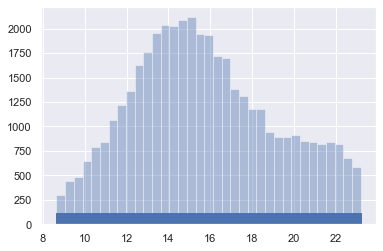

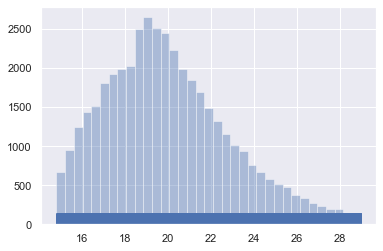

Cluster:  1


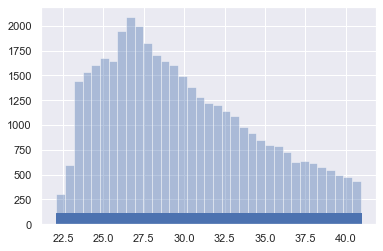

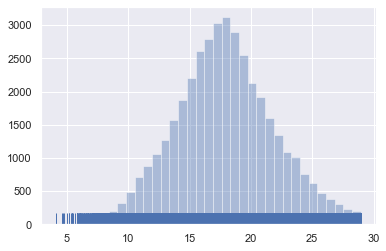

Cluster:  2


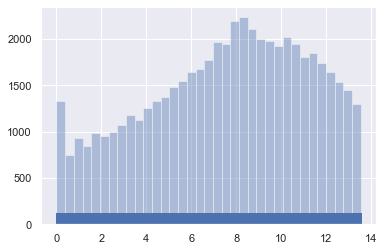

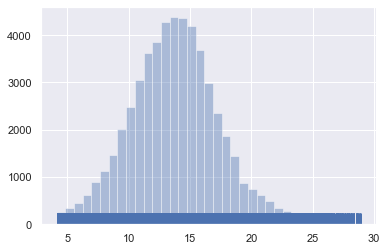

Cluster:  3


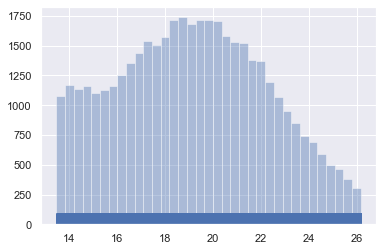

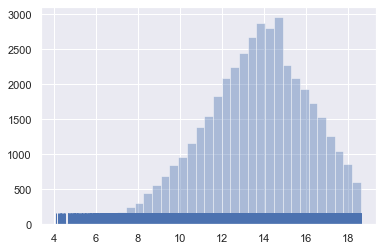

In [22]:
for i, files in enumerate(cluster_files):
    print("Cluster: ", i)
    plot_cluster(filename=files[0])
    plot_cluster(filename=files[1])

## GC content per cluster

In [23]:
ffile = "../../"
cluster_files=[(ffile +  "cluster_0_wga_w_gc.txt", ffile +  "cluster_0_no_wga_w.txt"),
               (ffile +  "cluster_1_wga_w_gc.txt", ffile +  "cluster_1_no_wga_w.txt"),
               (ffile +  "cluster_2_wga_w_gc.txt", ffile +  "cluster_2_no_wga_w.txt"),
               (ffile +  "cluster_3_wga_w_gc.txt", ffile +  "cluster_3_no_wga_w.txt")]

Cluster:  0


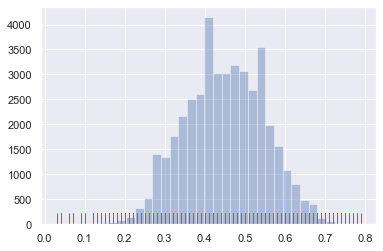

Cluster:  1


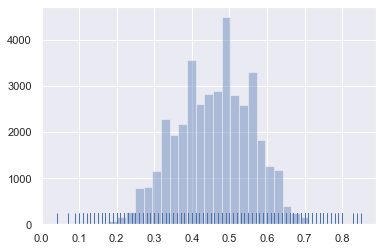

Cluster:  2


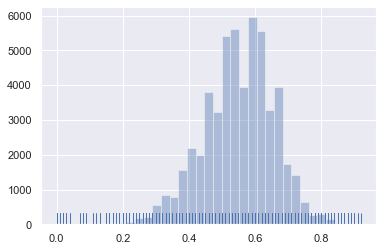

Cluster:  3


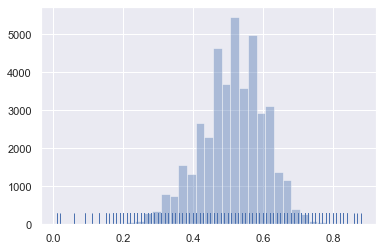

In [24]:
for i, files in enumerate(cluster_files):
    print("Cluster: ", i)
    plot_cluster(filename=files[0])

## Clusters means without GC content

In [11]:
ffile = "../../"
cluster_files=[(ffile +  "cluster_0_wga_w_mean.txt", ffile +  "cluster_0_no_wga_w_mean.txt"),
               (ffile +  "cluster_1_wga_w_mean.txt", ffile +  "cluster_1_no_wga_w_mean.txt"),
               (ffile +  "cluster_2_wga_w_mean.txt", ffile +  "cluster_2_no_wga_w_mean.txt"),
               (ffile +  "cluster_3_wga_w_mean.txt", ffile +  "cluster_3_no_wga_w_mean.txt")]

In [25]:
for i, files in enumerate(cluster_files):
    print("Cluster: ", i)
    #plot_cluster(filename=files[0])
    #plot_cluster(filename=files[1])

Cluster:  0
Cluster:  1
Cluster:  2
Cluster:  3
